In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Single Layer LSTM

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 860s 2s/step - loss: 0.5090 - accuracy: 0.7522 - val_loss: 0.4647 - val_accuracy: 0.7954
Epoch 2/10
391/391 [==============================] - 857s 2s/step - loss: 0.3561 - accuracy: 0.8612 - val_loss: 0.4276 - val_accuracy: 0.8192
Epoch 3/10
391/391 [==============================] - 900s 2s/step - loss: 0.3066 - accuracy: 0.8831 - val_loss: 0.4098 - val_accuracy: 0.8299
Epoch 4/10
391/391 [==============================] - 966s 2s/step - loss: 0.4185 - accuracy: 0.7950 - val_loss: 0.7271 - val_accuracy: 0.5107
Epoch 5/10
391/391 [==============================] - 1172s 3s/step - loss: 0.5553 - accuracy: 0.7176 - val_loss: 0.6248 - val_accuracy: 0.7383
Epoch 6/10
391/391 [==============================] - 1320s 3s/step - loss: 0.3643 - accuracy: 0.8485 - val_loss: 0.4368 - val_accuracy: 0.8065
Epoch 7/10
391/391 [==============================] - 1342s 3s/step - loss: 0.2621 - accuracy: 0.8980 - val_loss: 0.3858 - val_accuracy: 0.8

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

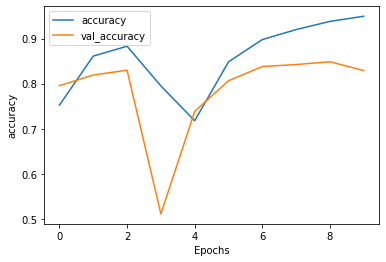

In [12]:
plot_graphs(history, 'accuracy')

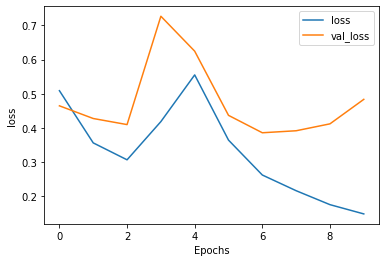

In [13]:
plot_graphs(history, 'loss')